In [39]:
# Kemp Carswell 801017179
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_csv('C:/Users/kemp/Downloads/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
#In our Data set we’ll consider Age and EstimatedSalary as Independent variable
X = dataset.iloc[:,0:8].values
Y = dataset.iloc[:,8].values

In [42]:
#Now we’ll split our Data set into Training Data and Test Data. Training data will be u
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = np.random)

In [43]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and Estimated
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [44]:
#Now let's try Naive Gaussian Bays
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [45]:
Y_pred = classifier.predict(X_test)

In [46]:
Y_pred[0:9]

array([1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
#Using Confusion matrix we can get accuracy of our model.
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[79, 13],
       [29, 33]], dtype=int64)

In [48]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, a
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7272727272727273
Precision: 0.717391304347826
Recall: 0.532258064516129


Text(0.5, 257.44, 'Predicted label')

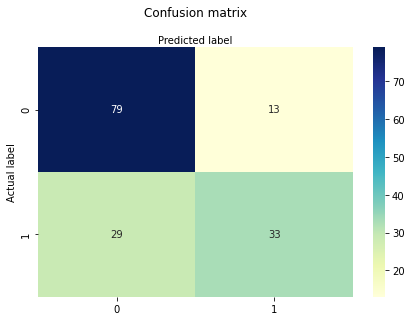

In [49]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matp
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')